In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

from matplotlib import font_manager, rc
font_path = "C:\Windows\Fonts\gulim.ttc"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [2]:
import pickle

In [3]:
native = pd.read_pickle('native.pkl')

# 전체적인 이용건수의 변화

## 현지인 매출

<AxesSubplot:xlabel='이용년월'>

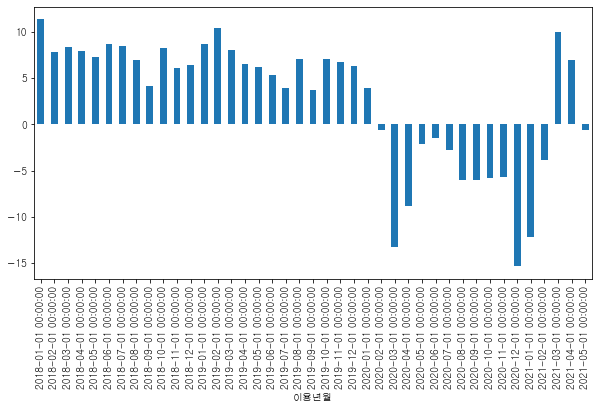

In [4]:
# 전년대비 변화
plt.figure(figsize=(10,5))
time = pd.DataFrame(native[['이용건수','취급액']].groupby(native['이용년월']).sum())
(time['이용건수'].pct_change(periods=12)['2018':]*100).plot(kind='bar')

In [5]:
native.columns

Index(['이용년월', '거주지', '가맹점 주소', '업종 대분류', '업종 소분류', '취급액', '이용건수', '성별', '연령대',
       '요일', '이용시간대'],
      dtype='object')

In [6]:
native['업종 대분류'].unique()

array(['취미오락', '스포츠활동', '문화예술활동', '여행'], dtype=object)

In [7]:
native[native['업종 대분류']=='문화예술활동']['업종 소분류'].unique()

array(['미술공예참여', '공연관람', '악기연주', '사진촬영', '음악감상'], dtype=object)

In [8]:
native['업종 소분류'].unique()

array(['외식', '스포츠용품구매', '레저스포츠', '골프', '미술공예참여', '헬스', '숙박', '공연관람', '목욕',
       '유흥', '관광쇼핑', '미용', '독서', '교육훈련', '패션쇼핑', '악기연주', '체험', '인터넷게임',
       '스키', '사진촬영', '종합쇼핑', '음악감상', '애완동물돌보기', '교통', '여행사', '종교활동',
       '자전거', '운동경기관람'], dtype=object)

## 업종 소분류 별 매출 변화 비교

In [101]:
use = {}
amount = {}
amount_per_use = {}

for i in native['업종 소분류'].unique().tolist():
    tem = native[native['업종 소분류']==i]
    tem['건당취급액'] = tem['취급액']/ tem['이용건수']
    tmp = pd.DataFrame(tem[['이용건수','취급액','건당취급액']].groupby(tem['이용년월']).sum())
    
    t = tmp['이용건수'].pct_change(periods=12)['2018':]*100
    use[i] = t
    
    t = tmp['취급액'].pct_change(periods=12)['2018':]*100
    amount[i] = t
    
    t = tmp['건당취급액'].pct_change(periods=12)['2018':]*100
    amount_per_use[i] = t

<ipython-input-101-0bc6304ff73c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tem['건당취급액'] = tem['취급액']/ tem['이용건수']


In [102]:
use = pd.DataFrame(use)
amount = pd.DataFrame(amount)
amount_per_use = pd.DataFrame(amount_per_use)

In [103]:
CovidChangeUse = use['2020':].mean().sort_values(ascending=False)
CovidChangeAmount = amount['2020':].mean().sort_values(ascending=False)
CovidChangeAPU = amount_per_use['2020':].mean().sort_values(ascending=False)

<AxesSubplot:>

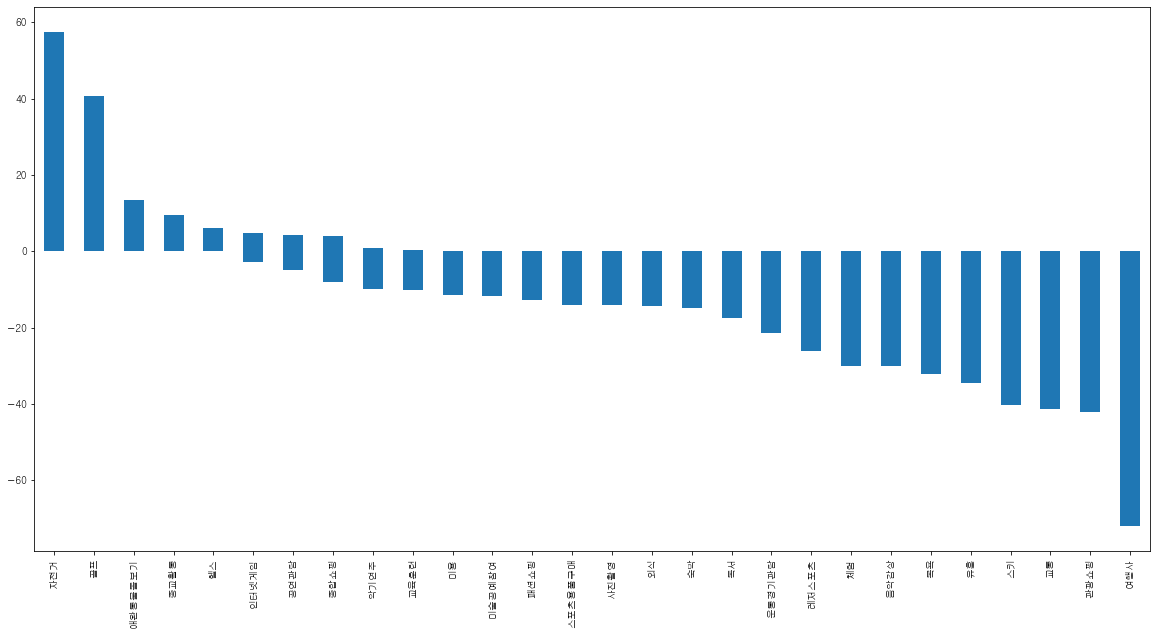

In [12]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

CovidChangeUse.plot(kind='bar')
CovidChangeAmount.plot(kind='bar')
CovidChangeAPU.plot(kind='bar')

## 전년대비 소비가 증가한 다섯가지 
## 골프, 자전거, 애완동물돌보기, 종합쇼핑, 종교활동
    
- 골프 : 실외활동, 사람들간의 거리가 먼 스포츠
- 자전거 : 실외활동,
- 애완동물돌보기 : 집에 있는 시간이 증가함에 따라 반려동물에 대한 수요 증가
- 종합쇼핑 : 다른 소비가 감소함에 따른 증가, 온라인 쇼핑(언택트)
- 종교활동 : 온라인 헌금으로 인한 매출증가로 보여짐(언택트)

#### 건당 취급액으로 보면 헬스, 인터넷게임, 공연관람, 종합쇼핑, 악기연주, 교육훈련까지도 소비가 증가함

In [13]:
from IPython.display import display_html
def display_side_by_side(*args):
    """여러 데이터프레임 비교가 쉽게 옆쪽으로 표시한다"""
    html_str=''
    for df in args:
        html_str += df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'), raw=True)

In [14]:
display_side_by_side(pd.DataFrame(CovidChangeUse, columns=['이용건수']), pd.DataFrame(CovidChangeAmount, columns=['취급액']), pd.DataFrame(CovidChangeAPU, columns=['건당취급액']))

,이용건수
자전거,25.884416
골프,10.865839
종합쇼핑,8.859506
종교활동,6.501045
애완동물돌보기,3.840359
교육훈련,-2.721181
체험,-4.876493
사진촬영,-8.049391
미술공예참여,-9.916908
스포츠용품구매,-10.024973


In [67]:
bike = native.loc[native['업종 소분류']=='자전거',['이용년월', '거주지', '가맹점 주소', '취급액', '이용건수', '성별', '연령대',
       '요일', '이용시간대']]

bike.reset_index(drop=True, inplace=True)
bike_multi = bike.set_index(['가맹점 주소','이용년월']).sort_index()
bike_multi

거주지      취급액  이용건수  성별  연령대  요일  이용시간대
가맹점 주소 이용년월                                             
강원 강릉시 2017-01-01  경기    92800     4   0   40   0      0
       2017-01-01  인천    69600     4   1   60   0      0
       2017-01-01  강원  7238400     4   0   40   1      1
       2017-01-01  강원    23200     4   0   20   0      0
       2017-01-01  강원  1424480    13   0   30   1      0
...                ..      ...   ...  ..  ...  ..    ...
충북 충주시 2021-05-01  경기    91620     5   1   40   1      0
       2021-05-01  충북   549720    20   0   20   1      0
       2021-05-01  경기   178150     5   0   30   1      0
       2021-05-01  세종   101800     5   0   50   1      1
       2021-05-01  충북   351210    10   1   60   1      0

[349054 rows x 7 columns]

<AxesSubplot:xlabel='이용년월'>

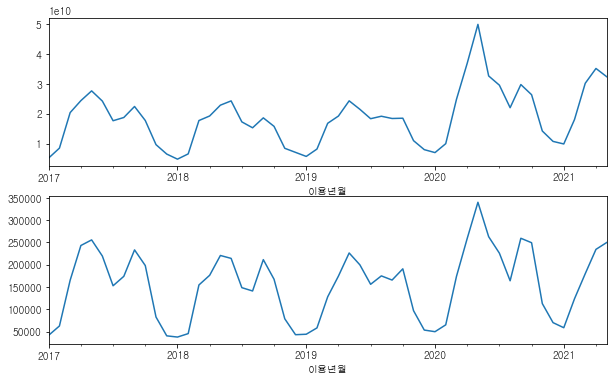

In [99]:
f, ax = plt.subplots(figsize = (10, 6)) 

plt.subplot(211)
bike_multi.sum(level='이용년월')['취급액'].plot()

plt.subplot(212)
bike_multi.sum(level='이용년월')['이용건수'].plot()

* 전체적인 매출, 이용건수의 증가추이 
  -> 확실히 코로나 이후로 변화가 보이는 것으로 파악된다

# 코로나 이전의 이용건수의 변화 추이를 바탕으로 예측하고 현재 이용건수와 비교해본다

* 코로나 이후(2020년)부터 이용건수의 양상이 확연하게 달라지는 것을 볼 수 있다
* 2021년 이후부터는 또 다시 가파르게 증가하는 양상이 보여진다 ( 2021년 이후에 어디서 가장 증가했는가? )

<font color = 'red'> * 코로나가 없었으면 이용건수가 어떻게 되었을지 예측해보고 코로나가 발생해서 나타난 차이를 본다.<font>

# 2021년 이후에 가장 빠르게 증가한 부분은 어디일까?

## 2021년에 다시 되살아나고 있는 부문들을 찾아봄

* 2021년 이후 매출변화 자료로 파악

In [106]:
NewNormalUse = use['2021':].T
UseRank = use['2021':].mean().sort_values(ascending=False).index.tolist()
NewNormalUse.reindex(UseRank).head(10)

이용년월,2021-01-01,2021-02-01,2021-03-01,2021-04-01,2021-05-01
체험,-53.549194,129.968252,134.109124,76.428762,40.168393
관광쇼핑,-74.320137,-13.383768,110.385884,157.377428,60.776644
사진촬영,-24.505083,28.888870,80.129413,56.956508,63.752117
미술공예참여,-30.525390,26.239953,73.422908,43.513456,24.738835
교육훈련,-17.347092,8.917583,87.440200,28.560318,9.041169
공연관람,-74.743487,-28.318506,49.061986,119.600892,48.413682
종교활동,-23.042016,45.569070,36.192566,21.805240,15.087383
교통,-47.163477,-4.530074,83.644034,37.485096,11.769821
헬스,-55.951546,-5.222302,77.456012,47.747237,13.939592
자전거,17.926522,90.003534,3.513031,-9.450700,-26.544904


In [107]:
NewNormalAmount = amount['2021':].T
AmountRank = amount['2021':].mean().sort_values(ascending=False).index.tolist()
NewNormalAmount.reindex(amount['2021':].mean().sort_values(ascending=False).index.tolist()).head(10)

이용년월,2021-01-01,2021-02-01,2021-03-01,2021-04-01,2021-05-01
관광쇼핑,-76.163639,-26.891800,134.812813,223.097546,79.716877
공연관람,-7.382979,22.022712,101.385191,122.577102,71.523791
체험,-53.217349,78.677220,117.374810,96.569638,38.126868
골프,69.953792,44.968029,40.800920,24.524876,14.693755
헬스,-47.524218,6.621436,137.006755,64.882737,15.655934
숙박,-37.579101,5.784593,62.782808,59.683899,30.510051
자전거,41.372581,81.025260,21.664753,-4.680535,-35.104190
교육훈련,-14.874762,4.154674,78.851210,21.497199,4.913905
미술공예참여,-13.164190,4.741823,52.565392,20.857723,25.508607
종교활동,-6.791807,10.946709,50.405580,8.336213,24.741555


In [108]:
NewNormalAPU = amount_per_use['2021':].T
ApuRank = amount_per_use['2021':].mean().sort_values(ascending=False).index.tolist()
NewNormalAPU.reindex(ApuRank).head(10)

이용년월,2021-01-01,2021-02-01,2021-03-01,2021-04-01,2021-05-01
공연관람,35.425608,18.843908,57.290066,47.272432,39.556609
골프,51.189813,19.686239,41.497898,31.358340,17.884163
헬스,-10.403154,1.438936,66.906942,32.192600,10.306314
자전거,28.116590,25.150340,29.162159,11.987901,-16.863223
애완동물돌보기,21.518162,-0.023643,21.047005,16.846876,15.953730
관광쇼핑,-46.731787,-23.438057,29.944590,65.849516,30.825449
사진촬영,-2.827788,-14.327869,29.018047,35.762937,5.480307
교육훈련,4.570807,-12.194248,32.521906,18.289152,5.020694
숙박,-20.225062,-11.520175,27.867228,38.763808,10.102028
체험,-32.075239,-11.565120,37.596272,35.242907,12.065025


In [113]:
Rank = {}

Rank['UseRank'] = UseRank
Rank['AmountRank'] = AmountRank
Rank['ApuRank'] = ApuRank

pd.DataFrame(Rank).head(10)

,UseRank,AmountRank,ApuRank
0,체험,관광쇼핑,공연관람
1,관광쇼핑,공연관람,골프
2,사진촬영,체험,헬스
3,미술공예참여,골프,자전거
4,교육훈련,헬스,애완동물돌보기
5,공연관람,숙박,관광쇼핑
6,종교활동,자전거,사진촬영
7,교통,교육훈련,교육훈련
8,헬스,미술공예참여,숙박
9,자전거,종교활동,체험


* 위의 소분류들이 코로나가 조금은 수그러듦에 따라 소비가 증가한 분류들임
* 즉, 위 분류들이 뉴노멀시대의 트랜드라 볼 수 있음

## 뉴노멀트랜드 
1. 체험, 관광에 대한 욕구는 가득 but 불안으로 조심하는 상황
2. 새로운 변화에 조금은 적응해가는 분위기 : 언택트(온라인), 비대면, 거리두기, 자전거

## 외국인 변화

In [92]:
foreigner = pd.read_pickle('foreigner.pkl')

In [93]:
foreigner[foreigner['가맹점 업종 소분류']=='자전거(성인용)']

,이용년월,가맹점 주소,국적,취급액,이용건수,가맹점 업종 대분류,가맹점 업종 소분류,요일
223598,2017-02-01,경남 거제시,오스트레일리아,39000,1,스포츠,자전거(성인용),1
224508,2017-03-01,경기 포천시,미국,30000,1,스포츠,자전거(성인용),1
224530,2017-06-01,서울 용산구,미국,4869000,23,스포츠,자전거(성인용),1
224540,2018-04-01,대구 수성구,미국,12901000,45,스포츠,자전거(성인용),1
224555,2018-09-01,제주 제주시,중국,2394942,32,스포츠,자전거(성인용),1
...,...,...,...,...,...,...,...,...
3264355,2021-03-01,제주 서귀포시,싱가폴,30000,1,스포츠,자전거(성인용),1
3264401,2021-04-01,서울 서대문구,미국,300000,1,스포츠,자전거(성인용),1
3264402,2020-08-01,서울 서대문구,미국,4710000,2,스포츠,자전거(성인용),1
3264490,2021-04-01,경기 의정부시,중국,82459,2,스포츠,자전거(성인용),1


## 외국인 매출

<AxesSubplot:xlabel='이용년월'>

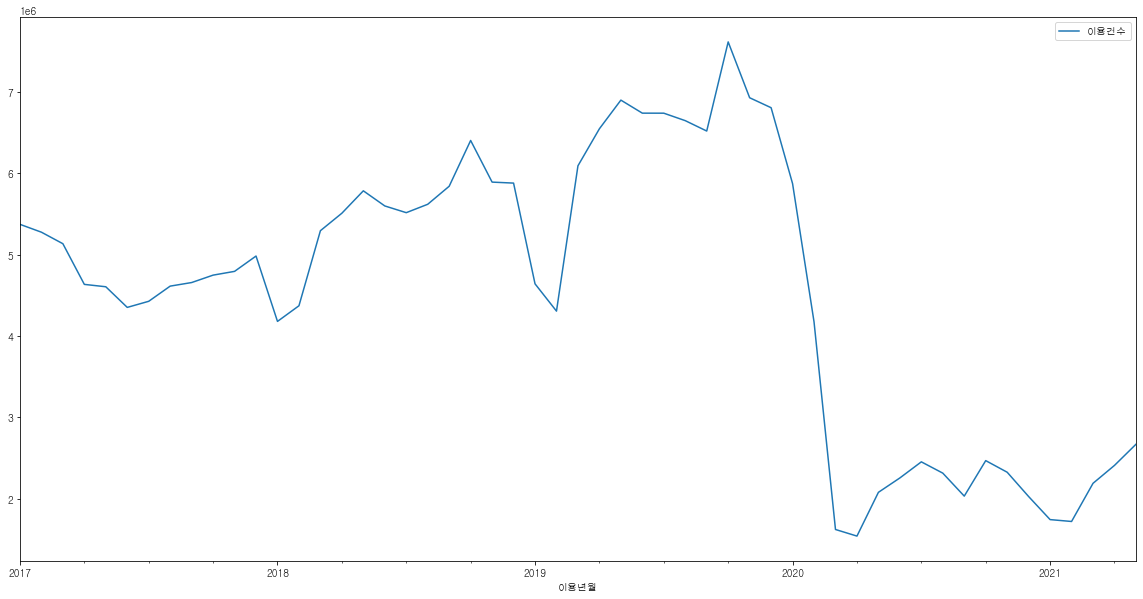

In [94]:
num1 = pd.DataFrame(foreigner['이용건수'].groupby(foreigner['이용년월']).sum())
num1.plot()